In [1]:
# importing general Python libraries
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
import pytz
import plotly.graph_objects as go

In [2]:
# importing orcasound_noise libraries
from orcasound_noise.pipeline.pipeline import NoiseAnalysisPipeline
from orcasound_noise.utils import Hydrophone
from orcasound_noise.pipeline.acoustic_util import plot_spec, plot_bb

In [3]:
Hydrophone.ORCASOUND_LAB

<Hydrophone.ORCASOUND_LAB: Hydrophone(name='orcasound_lab', bucket='streaming-orcasound-net', ref_folder='rpi_orcasound_lab', save_bucket='acoustic-sandbox', save_folder='ambient-sound-analysis/orcasound_lab', bb_ref=71.6406580028601)>

In [4]:
# Set Location and Resolution
# Port Townsend, 1 Hz Frequency, 60-second samples
# if __name__ == '__main__':
# pipeline = NoiseAnalysisPipeline(Hydrophone.PORT_TOWNSEND,
#                                     delta_f=10, bands=None,
#                                     delta_t=60, mode='safe')


# Set Location and Resolution
# Port Townsend, 1 Hz Frequency, 60-second samples
# if __name__ == '__main__':
pipeline = NoiseAnalysisPipeline(Hydrophone.ORCASOUND_LAB,
                                     delta_f=10, bands=None,
                                     delta_t=60, mode='safe')

In [16]:
print(now)

2024-06-15 22:38:07.196425-07:00


In [23]:
# Generate parquet dataframes with noise levels for a time period

# now = dt.datetime.now(pytz.timezone('US/Pacific'))
now = dt.datetime(2024, 6, 15, 22, 38)
psd_path, broadband_path = pipeline.generate_parquet_file(now - dt.timedelta(hours = 24), 
                                                          now - dt.timedelta(hours = 23), 
                                                          upload_to_s3=False)



live1489.ts: 0.00B [00:00, ?B/s]
live1487.ts: 0.00B [00:00, ?B/s]


live1490.ts: 0.00B [00:00, ?B/s]



live1492.ts: 0.00B [00:00, ?B/s]





live1491.ts: 0.00B [00:00, ?B/s]




live1493.ts: 0.00B [00:00, ?B/s]






live1494.ts: 0.00B [00:00, ?B/s]








live1496.ts: 0.00B [00:00, ?B/s]







live1495.ts: 0.00B [00:00, ?B/s]









live1498.ts: 0.00B [00:00, ?B/s]










live1497.ts: 0.00B [00:00, ?B/s]











live1499.ts: 0.00B [00:00, ?B/s]












live1500.ts: 0.00B [00:00, ?B/s]













live1501.ts: 0.00B [00:00, ?B/s]














live1502.ts: 0.00B [00:00, ?B/s]



live1492.ts:   7%|████▎                                                    | 8.19k/109k [00:00<00:01, 70.1kB/s]

live1489.ts:   7%|████▎                                                    | 8.19k/110k [00:00<00:01, 52.8kB/s]
live1488.ts:   7%|████▎                                                    | 8.19k/109k [00:00<00:01, 55.9kB/s]


live1492.ts: 115kB [00:00, 771kB/s]                      

In [25]:
# Read the parquet files
psd_df = pd.read_parquet(psd_path)
bb_df = pd.read_parquet(broadband_path)

In [26]:
# Create a new directory if it does not exist
if not os.path.exists('img'):
   os.makedirs('img')

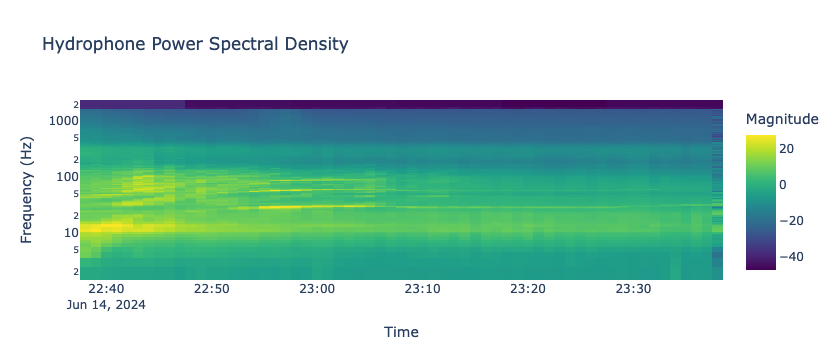

In [27]:
# Create and save psd plot 
fig = plot_spec(psd_df)
#fig.write_image('img/psd.png')
fig.show()

/var/folders/x7/xtv7b_3d7d9d0m9gzz8q3vb00000gn/T/ipykernel_66700/236848598.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



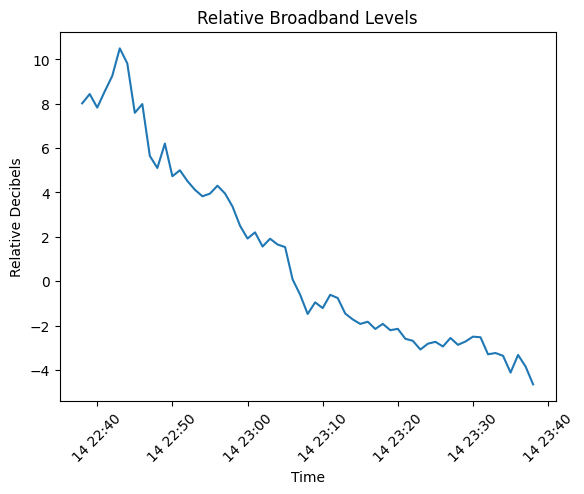

In [30]:
# Create and save bb plot
fig = plot_bb(bb_df)
#fig.savefig('img/broadband.png')
fig.show()

In [33]:
cd ..

/Users/valentina/projects/teaching/SciPy2024-GitHubActionsTutorial


In [34]:
ls

README.md                  glacier_image_correlation/
_build/                    website_figure/
ambient_sound_analysis/


In [35]:
ls ambient_sound_analysis

_build/                  noise_processing.py      requirements_noise.txt
img/                     plot_noise_levels.ipynb


In [36]:
broadband_path

'/var/folders/x7/xtv7b_3d7d9d0m9gzz8q3vb00000gn/T/tmpf55iigum/20240614T223800_20240614T233800_60s_broadband.parquet'